## Annotate the curated cluster designations into the anndata object

In [1]:
!date

Tue Mar 12 17:00:39 EDT 2024


#### import libraries

In [2]:
import scanpy as sc
from pandas import read_csv
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt

# for white background of figures (only for docs rendering)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

#### set notebook variables

In [3]:
# naming
project = 'aging_phase2'

# directories
wrk_dir = '/labshare/raph/datasets/adrd_neuro/brain_aging/phase2'
quants_dir = f'{wrk_dir}/quants'
figures_dir = f'{wrk_dir}/figures'
sc.settings.figdir = f'{figures_dir}/'

# in files
multivi_anndata_file = f'{quants_dir}/{project}.multivi.h5ad'
curated_file = f'{quants_dir}/{project}_curated_obs.csv'

# out files
new_multivi_anndata_file = f'{quants_dir}/{project}.multivi.curated.h5ad'

# variables
DEBUG = False

### load data

#### load the anndata object

In [4]:
%%time
adata_multivi = sc.read_h5ad(multivi_anndata_file)
print(adata_multivi)
if DEBUG:
    display(adata_multivi.obs.head())

AnnData object with n_obs × n_vars = 238278 × 226404
    obs: 'sample_id', 'donor_id', 'geno_IID', 'sex', 'ancestry', 'age', 'gex_pool', 'atac_pool', 'pmi', 'ph', 'smoker', 'bmi', 'rin', 'phase1_cluster', 'phase1_celltype', 'Study', 'Study_type', 'modality', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_indices', '_scvi_batch', '_scvi_labels', 'leiden_MultiVI', 'Cell_type', 'RefCluster'
    var: 'ID', 'modality', 'chr', 'start', 'end', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'Cell_type_colors', 'Study_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_MultiVI_colors', 'neighbors', 'phase1_celltype_colors', 'phase1_cluster_colors', 'sample_id_colors', 'umap'
    obsm: 'MultiVI_latent', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'
CPU 

#### load the curated cell info

In [5]:
curated_info = read_csv(curated_file, index_col=0)
curated_info = curated_info.rename(columns={'leiden_MultiVI': 'curated'})
print(f'shape of curated info {curated_info.shape}')
if DEBUG:
    display(curated_info.sample(5))
    display(curated_info.curated.value_counts())

shape of curated info (232327, 24)


/tmp/ipykernel_64501/2327127495.py:1: DtypeWarning: Columns (7,8,14,15,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  curated_info = read_csv(curated_file, index_col=0)


### drop the public reference cells that were included for clustering

In [6]:
adata_multivi = adata_multivi[adata_multivi.obs.Study_type == 'discovery']
print(adata_multivi)
if DEBUG:
    display(adata_multivi.obs.sample(5))
    display(adata_multivi.obs.Study_type.value_counts())
    display(adata_multivi.obs.Study.value_counts())    

View of AnnData object with n_obs × n_vars = 229074 × 226404
    obs: 'sample_id', 'donor_id', 'geno_IID', 'sex', 'ancestry', 'age', 'gex_pool', 'atac_pool', 'pmi', 'ph', 'smoker', 'bmi', 'rin', 'phase1_cluster', 'phase1_celltype', 'Study', 'Study_type', 'modality', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_indices', '_scvi_batch', '_scvi_labels', 'leiden_MultiVI', 'Cell_type', 'RefCluster'
    var: 'ID', 'modality', 'chr', 'start', 'end', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'Cell_type_colors', 'Study_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_MultiVI_colors', 'neighbors', 'phase1_celltype_colors', 'phase1_cluster_colors', 'sample_id_colors', 'umap'
    obsm: 'MultiVI_latent', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distanc

### annotated the cells with the curated cell-types

In [7]:
adata_multivi.obs['curated_type'] = None
for celltype in curated_info.curated.unique():
    cluster_cell_ids = set(curated_info.loc[curated_info.curated == celltype].index)
    parts = celltype.split('-')
    # here ignoring any of the '-ATAC' named types
    cellname = parts[0]
    print(celltype, cellname)
    print(len(cluster_cell_ids))
    adata_multivi.obs.loc[adata_multivi.obs.index.isin(cluster_cell_ids), 'curated_type'] = cellname
if DEBUG:
    display(adata_multivi.obs.sample(5))

/tmp/ipykernel_64501/2596671791.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_multivi.obs['curated_type'] = None


OD-0 OD
25677
ExN-9 ExN
10536
OD-ATAC-5 OD
13346
ExN-22 ExN
2686
OPC-4 OPC
13425
Micro-3 Micro
13927
ExN-11 ExN
8257
OD-6 OD
12183
InN-12 InN
7626
InN-26 InN
1850
ExN-7 ExN
11421
InN-10 InN
9340
Astro-2 Astro
16719
Astro-14 Astro
6480
PeriVasc-29 PeriVasc
1615
InN-27 InN
1786
ExN-8 ExN
11049
InN-17 InN
3893
ExN-32 ExN
988
ExN-13 ExN
7173
ExN-28 ExN
1659
Uncertain-ATAC-34 Uncertain
653
OD-25 OD
2391
ExN-1 ExN
17361
InN-16 InN
4816
ExN-31 ExN
1117
ExN-21 ExN
2903
VLMC-19 VLMC
3316
ExN-15 ExN
3916
InN-18 InN
3325
ExN-24 ExN
2426
InN-23 InN
2500
ExN-30 ExN
1536
OPC-36 OPC
332
OD-ATAC-35 OD
431
Uncertain-20 Uncertain
2972
Radial Glia-33 Radial Glia
696


In [8]:
if DEBUG:
    display(adata_multivi.obs.curated_type.value_counts())

### assign the small number of cells that may have moved around during re-clustering or dropped in or out around thresholds

make the assigment based on what the rest of the cluster was called

In [9]:
if DEBUG:
    display(adata_multivi.obs.loc[adata_multivi.obs.curated_type.isna()].Cell_type.value_counts())

In [10]:
for cluster_number in adata_multivi.obs.leiden_MultiVI.unique():
    # new_assignment = set()
    print(f'--- {cluster_number}')
    this_cell_set = set(adata_multivi.obs.loc[adata_multivi.obs.leiden_MultiVI == cluster_number].index)
    new_assignment = adata_multivi.obs[adata_multivi.obs.leiden_MultiVI == cluster_number].curated_type.value_counts().idxmax()
    if DEBUG:
        print(len(this_cell_set))
        display(adata_multivi.obs[adata_multivi.obs.leiden_MultiVI == cluster_number].curated_type.value_counts()) 
        print(new_assignment)        
    adata_multivi.obs.loc[adata_multivi.obs.index.isin(this_cell_set), 'curated_type'] = new_assignment

--- 0
--- 10
--- 5
--- 24
--- 3
--- 2
--- 13
--- 42
--- 8
--- 30
--- 4
--- 11
--- 1
--- 15
--- 43
--- 18
--- 32
--- 6
--- 23
--- 47
--- 12
--- 46
--- 34
--- 20
--- 25
--- 17
--- 7
--- 41
--- 27
--- 29
--- 31
--- 9
--- 19
--- 35
--- 14
--- 40
--- 26
--- 37
--- 16
--- 48
--- 28
--- 38
--- 33
--- 52
--- 53
--- 22
--- 21
--- 44
--- 45
--- 54
--- 39
--- 36
--- 49
--- 50
--- 55
--- 51


In [11]:
if DEBUG:
    display(adata_multivi.obs.curated_type.value_counts())

### set the cluster names given the curate cell type assignment and original cluster number

In [12]:
adata_multivi.obs['cluster_name'] = adata_multivi.obs.curated_type + '-' + adata_multivi.obs.leiden_MultiVI.astype('str')
print(f'new shape of obs {adata_multivi.obs.shape}')
print(adata_multivi)
if DEBUG:
    display(adata_multivi.obs.sample(5))
    display(adata_multivi.obs.cluster_name.value_counts())

new shape of obs (229074, 30)
AnnData object with n_obs × n_vars = 229074 × 226404
    obs: 'sample_id', 'donor_id', 'geno_IID', 'sex', 'ancestry', 'age', 'gex_pool', 'atac_pool', 'pmi', 'ph', 'smoker', 'bmi', 'rin', 'phase1_cluster', 'phase1_celltype', 'Study', 'Study_type', 'modality', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_indices', '_scvi_batch', '_scvi_labels', 'leiden_MultiVI', 'Cell_type', 'RefCluster', 'curated_type', 'cluster_name'
    var: 'ID', 'modality', 'chr', 'start', 'end', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'Cell_type_colors', 'Study_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_MultiVI_colors', 'neighbors', 'phase1_celltype_colors', 'phase1_cluster_colors', 'sample_id_colors', 'umap'
    obsm: 'MultiVI_latent', 'X_umap', '_scvi_extra_

In [13]:
adata_multivi.obs.curated_type.value_counts()

curated_type
ExN            81258
OD             54337
InN            35089
Astro          22912
Micro          14197
OPC            12936
VLMC            3192
Uncertain       2914
PeriVasc        1548
Radial Glia      691
Name: count, dtype: int64

In [14]:
adata_multivi.obs[adata_multivi.obs.cluster_name == 'InN-51']

sample_id    donor_id      geno_IID     sex  \
TAGCCGGAGTACTCTG-4_accessibility  Aging108  NHBCC-1669  4031091062_A  Female   

                                   ancestry   age gex_pool atac_pool   pmi  \
TAGCCGGAGTACTCTG-4_accessibility  Caucasian  83.6      4.0       1.0  33.5   

                                    ph  ...  total_counts_mt  pct_counts_mt  \
TAGCCGGAGTACTCTG-4_accessibility  6.78  ...              0.0            0.0   

                                  _indices _scvi_batch _scvi_labels  \
TAGCCGGAGTACTCTG-4_accessibility    213784           0            0   

                                 leiden_MultiVI Cell_type RefCluster  \
TAGCCGGAGTACTCTG-4_accessibility             51       Inh   EC:Inh.2   

                                  curated_type  cluster_name  
TAGCCGGAGTACTCTG-4_accessibility           InN        InN-51  

[1 rows x 30 columns]

In [15]:
if DEBUG:
    for cluster_num in adata_multivi.obs.leiden_MultiVI.unique():
        print(f'### cluster number: {cluster_num}')
        display(adata_multivi.obs[adata_multivi.obs.leiden_MultiVI == cluster_num].curated_type.value_counts())
        display(adata_multivi.obs[adata_multivi.obs.leiden_MultiVI == cluster_num].modality.value_counts())    

### visualize the final curated clusters

/home/gibbsr/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/gibbsr/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


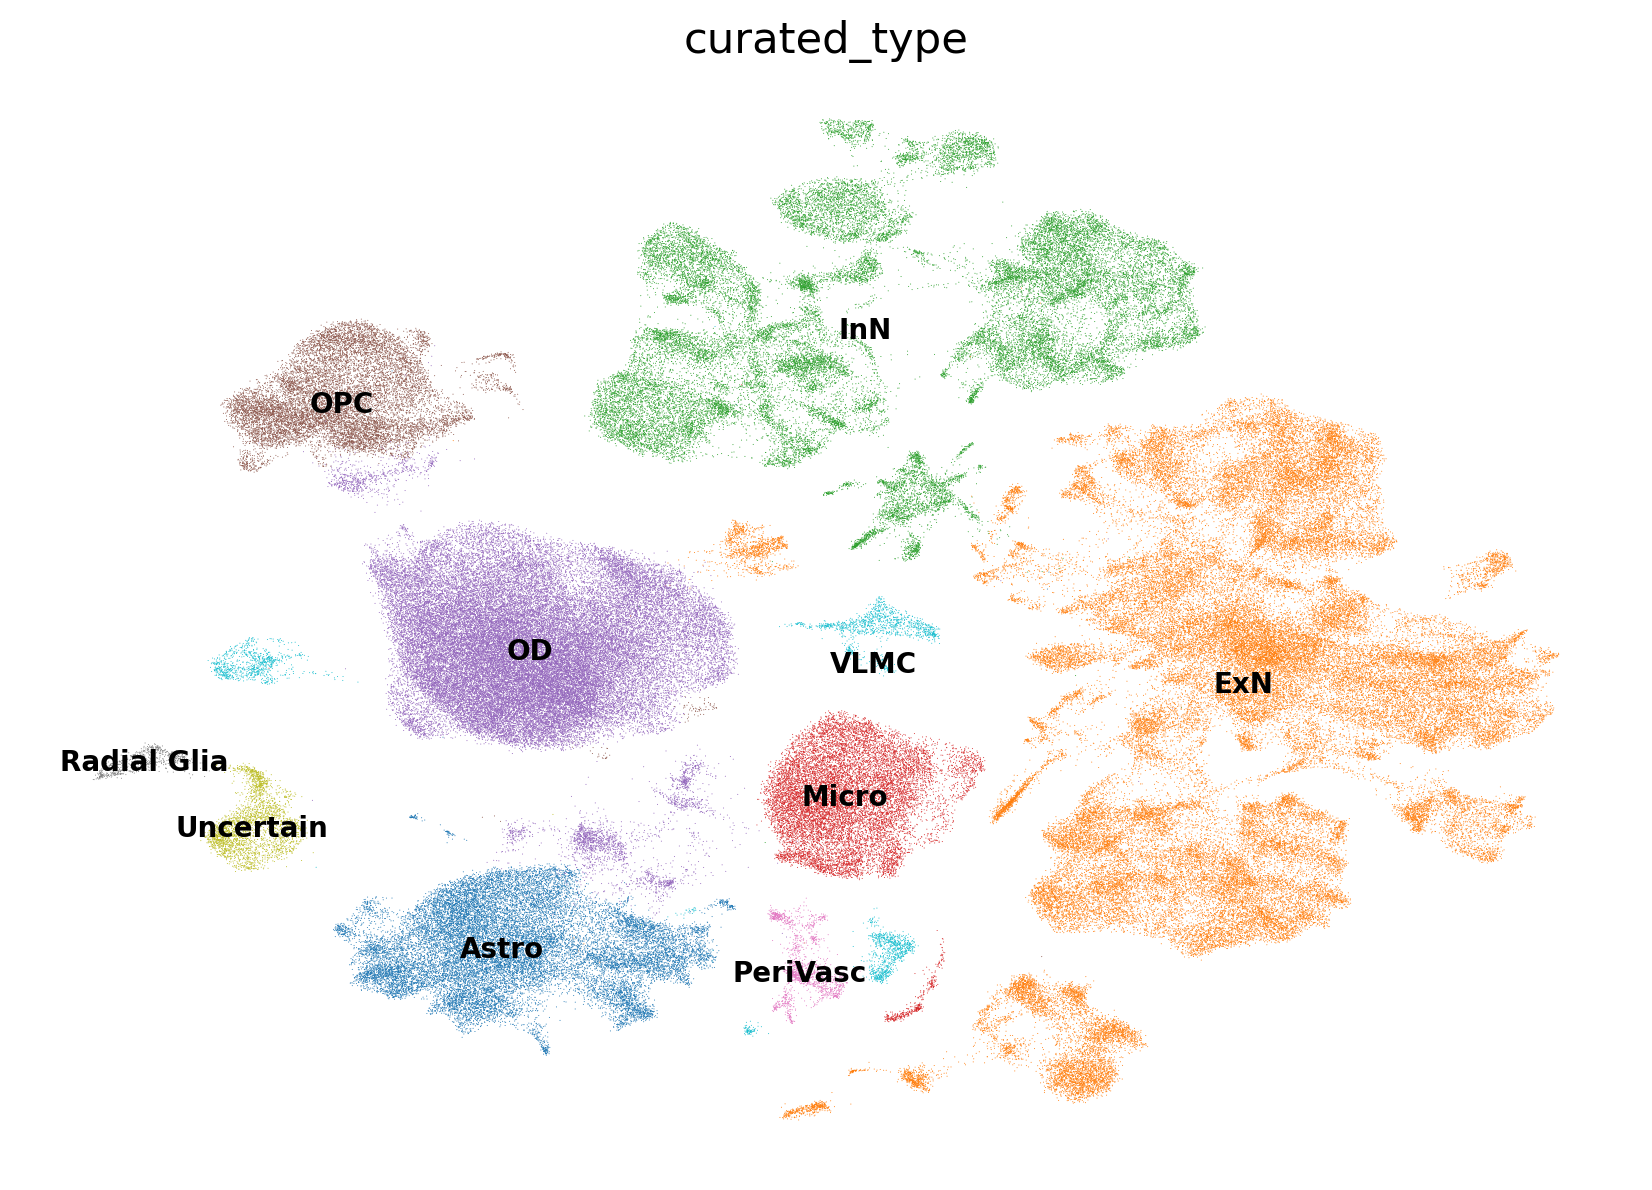

In [16]:
figure_file = f'_{project}.umap.curated_celltype.png'
with rc_context({'figure.figsize': (8, 8), 'figure.dpi': 100}):
    plt.style.use('seaborn-v0_8-talk')
    sc.pl.umap(adata_multivi, color=['curated_type'], 
               frameon=False, legend_loc='on data', save=figure_file)

/home/gibbsr/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/gibbsr/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


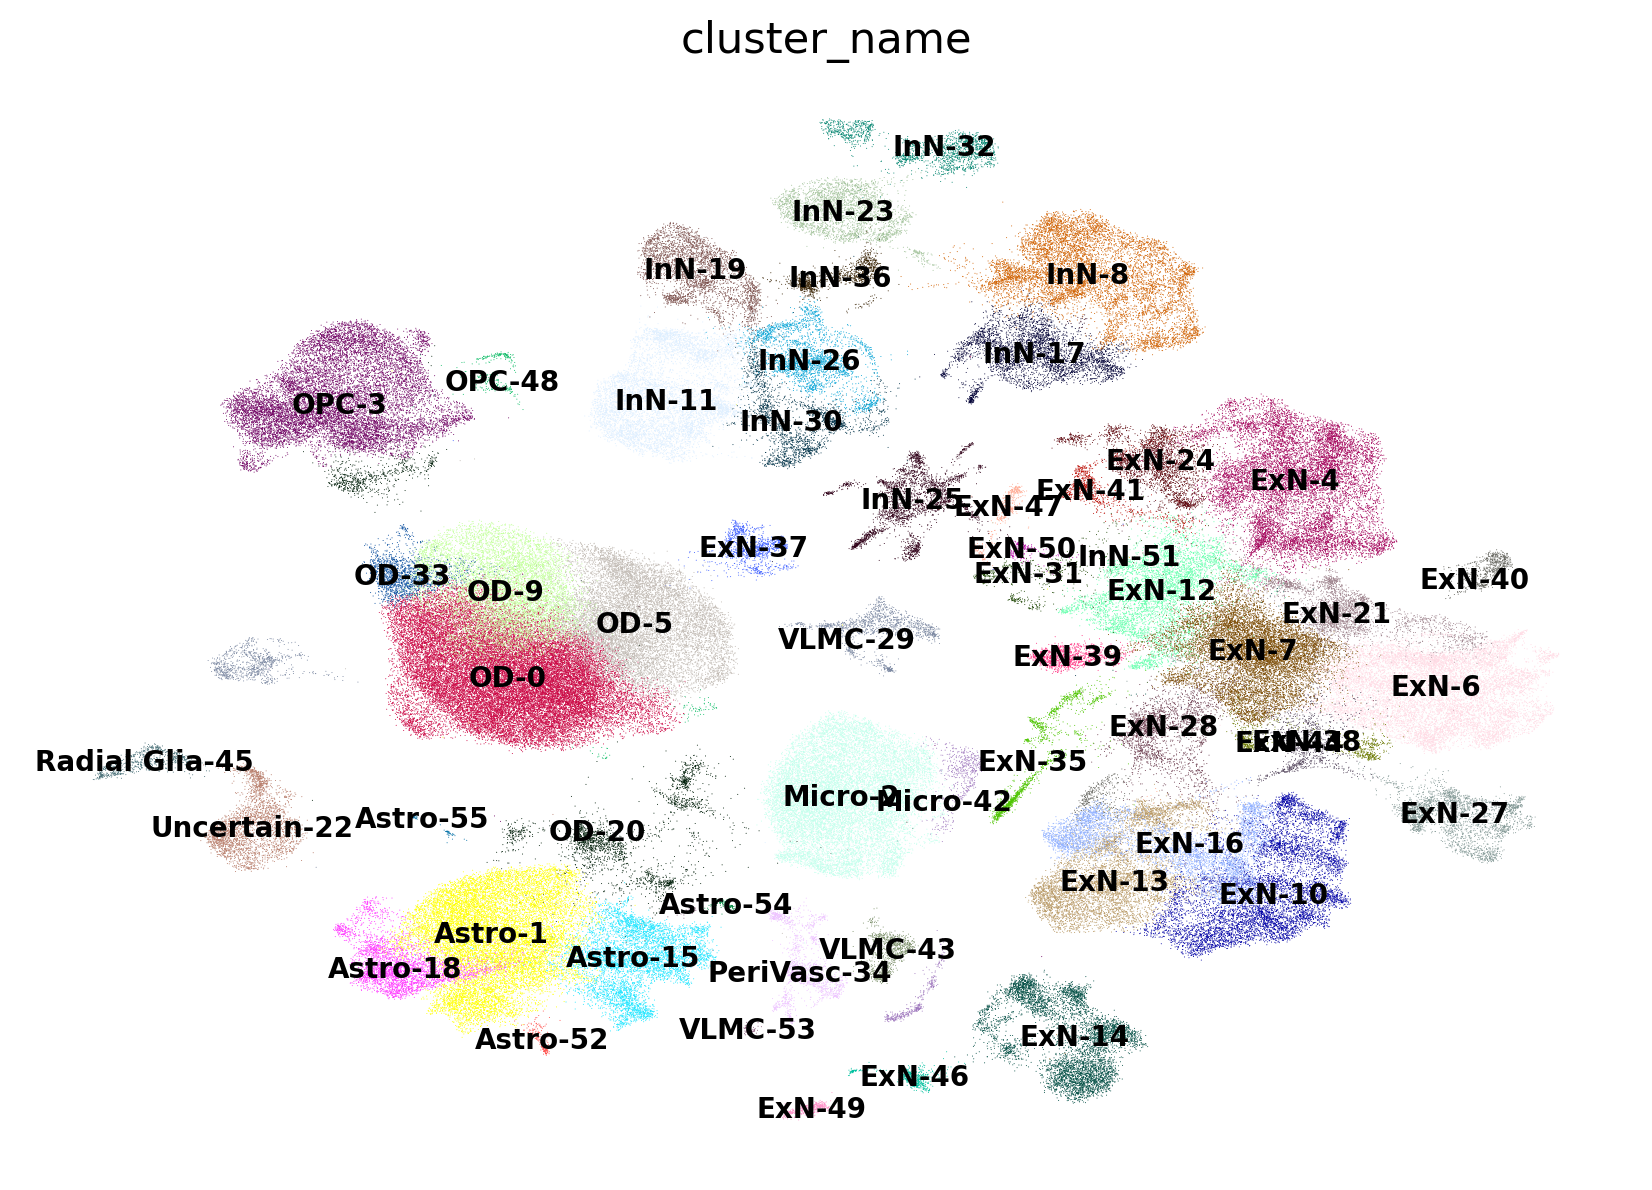

In [17]:
figure_file = f'_{project}.umap.curated_cluster_names.png'
with rc_context({'figure.figsize': (8, 8), 'figure.dpi': 100}):
    plt.style.use('seaborn-v0_8-talk')
    sc.pl.umap(adata_multivi, color=['cluster_name'], 
               frameon=False, legend_loc='on data', save=figure_file)

/home/gibbsr/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/gibbsr/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


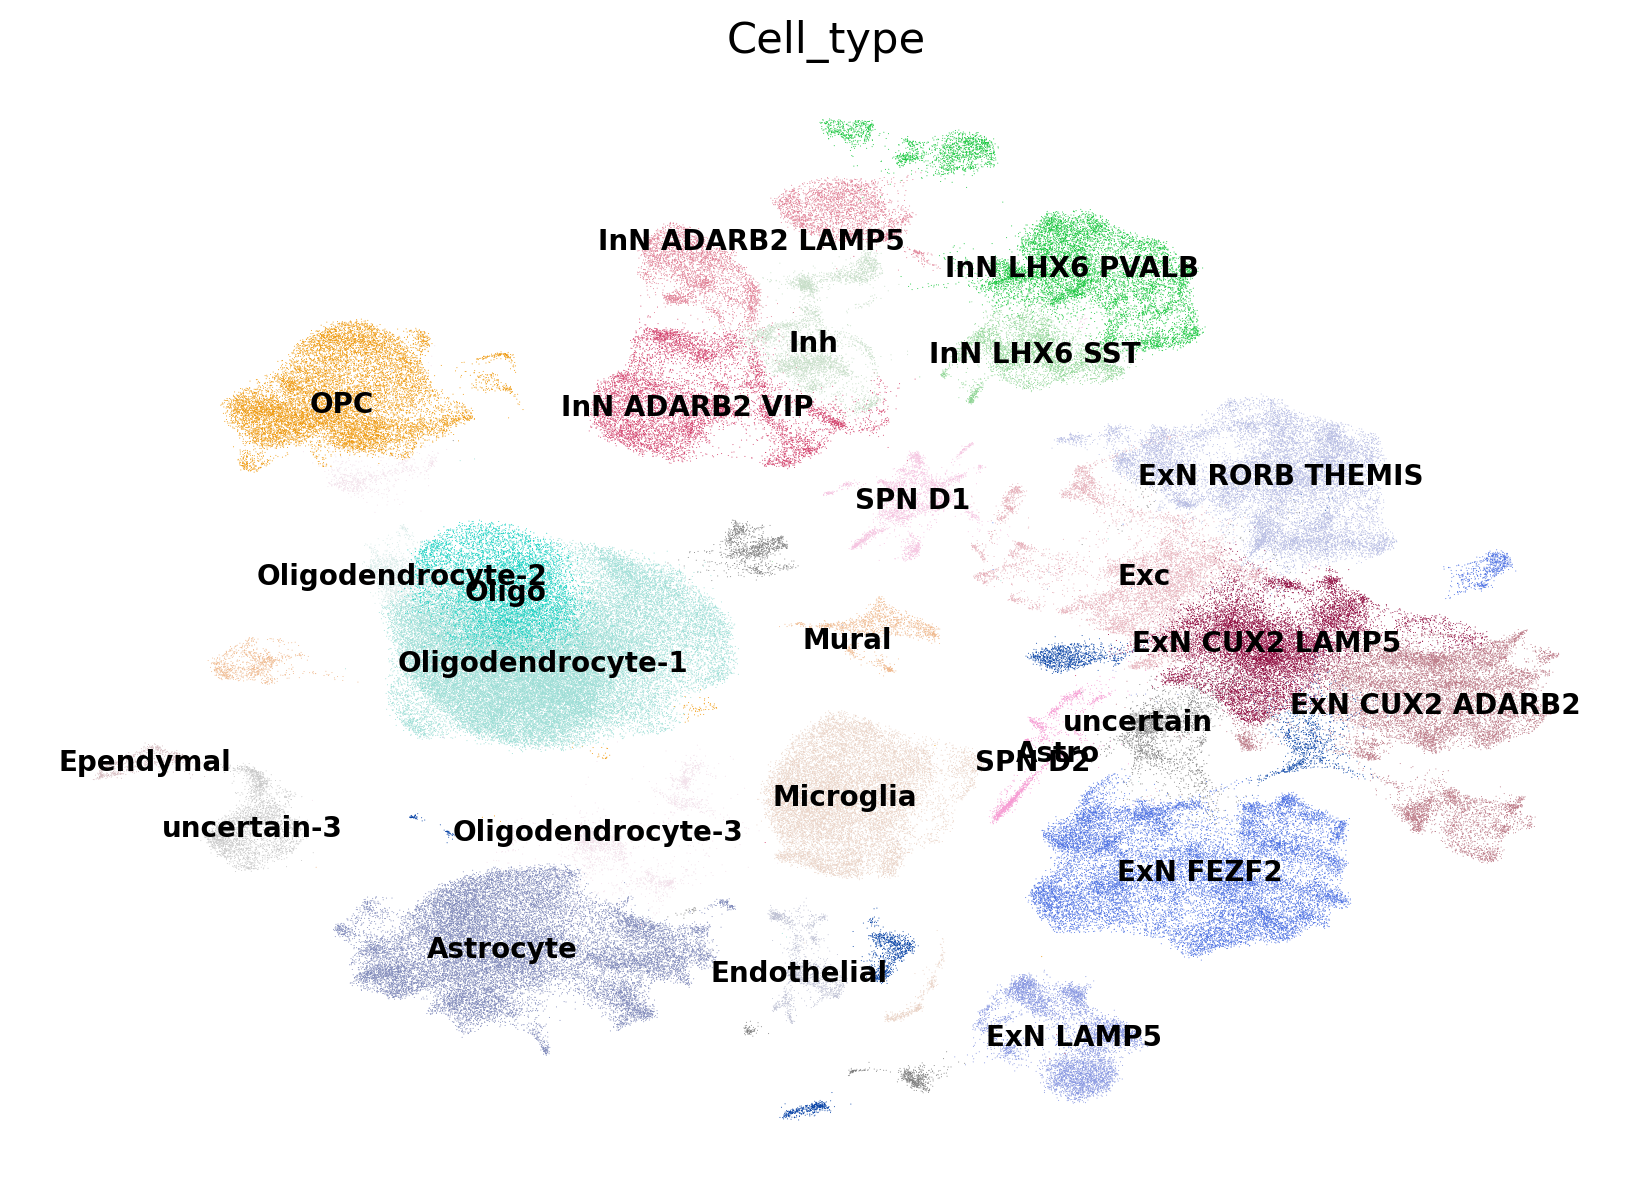

In [18]:
figure_file = f'_{project}.umap.curated_prev_celltypes.png'
with rc_context({'figure.figsize': (8, 8), 'figure.dpi': 100}):
    plt.style.use('seaborn-v0_8-talk')
    sc.pl.umap(adata_multivi, color=['Cell_type'], 
               frameon=False, legend_loc='on data', save=figure_file)

### save the modified anndata object

In [19]:
adata_multivi.write(new_multivi_anndata_file)

In [20]:
!date

Tue Mar 12 17:01:47 EDT 2024
